In [1]:
import numpy as np
from numpy import random
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import time
import torch

In [2]:
from TNT1 import TNT_convert
from TNT1 import similar_cos

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 7]

In [4]:
np.random.seed(19680801)
torch.manual_seed(80)

# example data
x1 =  torch.normal(0., 1., size=(1, 200))

In [5]:
x2 = torch.rand(size=(1,200))

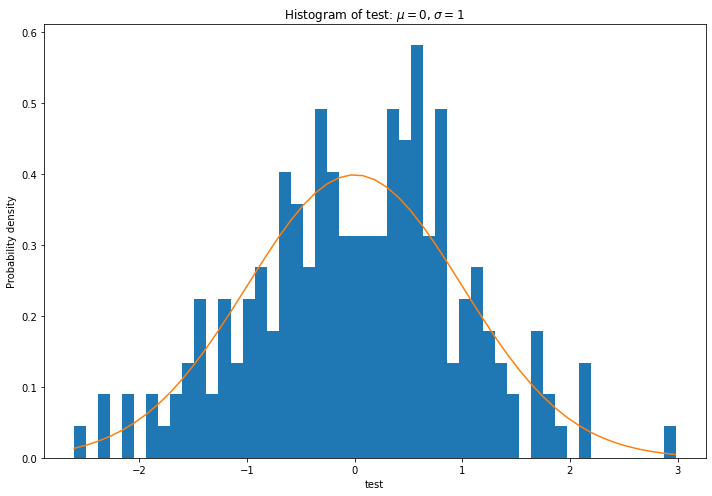

In [6]:
fig, ax = plt.subplots()
num_bins=50
sigma = 1
mu = 0
# the histogram of the data
n, bins, patches = ax.hist(x1, num_bins, density=5)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y)
ax.set_xlabel('test')
ax.set_ylabel('Probability density')
ax.set_title('Histogram of test: $\mu=0$, $\sigma=1$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

In [7]:
def plot_figx(similarValue, maxValue, maxIndex, name=None):
    fig1, ax1 = plt.subplots()
    x = range(0, len(similarValue[0]))
    # c = float(maxIndex+1) / float(len(similarValue)+1)
    ax1.set_xlabel('Items of Sorted Vector', fontsize=20)
    ax1.set_ylabel('Consine Similarity', fontsize=20)
    color = ['r', 'b']
    color1 = ['c', 'k']
    label = ['normal', 'uniform']
    for i, elem in enumerate(similarValue):
        ax1.plot(x, elem, C=color[i], label=label[i])
        
    for i, elem in enumerate(maxValue):
        ax1.axhline(elem, color=color1[i], linestyle="--")
        th1 = ax1.text(0, elem, 'Max_value: {:,.2f}'.format(elem), color='red', fontsize=20, rotation_mode='anchor')
    for i, elem in enumerate(maxIndex):
        ax1.axvline(elem, color=color1[i], linestyle="--")
        th2 = ax1.text(elem, 0, '{} non-zero items'.format(elem), fontsize=20, rotation=90, rotation_mode='anchor')
    ax1.legend(fontsize=20, loc='best')
    ax1.ticklabel_format(useOffset=False, style='plain')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.tight_layout()
    if name == None:
        pass
    else:
        plt.savefig('{}.pdf'.format(name), dpi=400)
    plt.show()

In [8]:
target_hat_sorted_index, similar_value1, maxValue_conv1, maxIndex_conv1 = similar_cos(x1)
target_hat_sorted_index, similar_value2, maxValue_conv2, maxIndex_conv2 = similar_cos(x2)

similarValue = [similar_value1, similar_value2]
maxValue = [maxValue_conv1, maxValue_conv2]
maxIndex = [maxIndex_conv1, maxIndex_conv2]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # This is added back by InteractiveShellApp.init_path()


TypeError: unsupported format string passed to Tensor.__format__

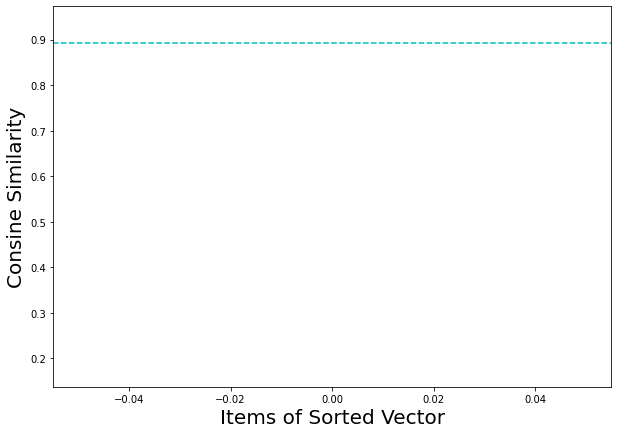

In [9]:
plot_figx(similarValue, maxValue, maxIndex, name="Cosine Similarity MaxIndx0")

In [10]:
ternary, cos = TNT_convert(x1)

In [11]:
total = len(ternary)
zeros = ternary.tolist().count(0)
print(total)
print(zeros)
print(zeros / total)

1
0
0.0


In [12]:
cos[np.argmax(cos)+3]

IndexError: index 3 is out of bounds for dimension 0 with size 1

In [13]:
x = np.arange(0, len(similarValue1), 1)
f1 = np.polyfit(x, similarValue1, 4)

NameError: name 'similarValue1' is not defined

In [14]:
p1 = np.poly1d(f1)
df_1 = np.poly1d.deriv(p1)
df_2 = np.poly1d.deriv(df_1)
print(p1)
print(df_1)
print(df_2)
y_value = p1(x)
yd_1 = df_1(x)
yd_2 = df_2(x)
#绘图
plot1 = plt.plot(x, similarValue1, 's',label='original values')
plot2 = plt.plot(x, y_value, 'r',label='polyfit values')
# plot3 = plt.plot(x, yd_1, 'k',label='values')
# plot2 = plt.plot(x, yd_2, 'r',label='values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=4) #指定legend的位置右下角
plt.title('polyfitting')
plt.show()

NameError: name 'f1' is not defined

In [88]:
def plot_fig1(maxValue, name=None):
    fig1, ax1 = plt.subplots()
    minvalue = np.min(maxValue[0])
    maxvalue = np.max(maxValue[0])
    label_ = ['Ternary', 'Binary']
    lebel =  ['mean', None]
    bbox = dict(boxstyle="round", fc="0.8")
    arrowprops = dict(arrowstyle="->",
                      connectionstyle="angle, angleA=0, angleB=90, rad=10")
    for counter, elem in enumerate(maxValue):
        mean_value = np.mean(elem)
        std_value = np.std(elem)
        x = range(0, len(elem))
        ax1.plot(x, elem, lw=2, label="{}".format(label_[counter]))
        ax1.axhline(mean_value, lw=2, label=lebel[counter], color='r', linestyle="--")
        minvalue_ = np.min(elem)
        maxvalue_ = np.max(elem)
        if counter == 0:
            plt.annotate("Mean value: {:.2f}\n Std value: {:,.2}".format(mean_value*100, std_value),
                         xy=(1000, mean_value),
                         xytext=(200, maxvalue_-0.01),
                         #arrowprops=dict(facecolor='black', shrink=0.05),
                         arrowprops=arrowprops,
                         fontsize=22,
                         bbox=bbox,
                         color='k')
        else:
             plt.annotate("Mean value: {:.2f}%\n Std value: {:,.2}".format(mean_value*100, std_value),
                         xy=(1000, mean_value),
                         xytext=(200, minvalue_+0.02),
                         arrowprops=arrowprops,
                         fontsize=22,
                         bbox=bbox,
                         color='k')

    ax1.set_ylim([minvalue - 0.05, maxvalue+0.02])
    ax1.legend(fontsize=20, loc='best')
    vals = ax1.get_yticks()
    ax1.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
    ax1.set_ylabel('Cosine Similarity', fontsize=20)
    ax1.set_xlabel('Length of Target Vector', fontsize=20)

    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.tight_layout()

    if name == None:
        pass
    else:
        plt.savefig('{}.eps'.format(name), dpi=300)
    
    plt.show()

In [119]:
np.array(ori_angle)

array([2.68350577, 1.10162818, 1.0876435 , ..., 1.56307769, 1.56239104,
       1.57104802])

In [5]:
maxresult_t = []
x_input = torch.normal(0,1,size=(1,100000))

error_list=[]
ori_angle=[]
t_angle = []

for x in range(2,100000):
    if x %1000 ==0:
        print(x)
    unit_vector_1 = x_input[:,:x]/np.linalg.norm(x_input[:,:x])
    x = torch.normal(0, 1, size=(1,x))
    x_t = TNT_convert(x)[0]
    unit_vector_2 = x/np.linalg.norm(x)
    unit_vector_3 = x_t/np.linalg.norm(x_t)
    dot_product_1 = np.dot(unit_vector_1, unit_vector_2.T)
    angle1 = np.arccos(dot_product_1)
    dot_product_2 = np.dot(unit_vector_1, unit_vector_3.T)
    angle2 = np.arccos(dot_product_2)
    ori_angle.append((angle1.item()*180)/np.pi)
    t_angle.append((angle2.item()*180)/np.pi)
    error= np.abs(((angle2.item()*180)/np.pi)-((angle1.item()*180)/np.pi))
    error_list.append(error)
#     print(f"error:{error}")
    

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000


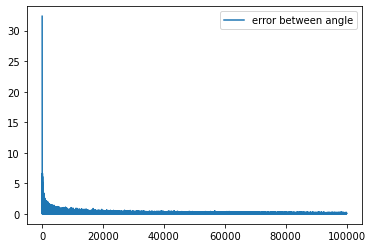

In [14]:
plt.plot(range(2,100000), error_list,label="error between angle")
plt.legend()

range(0, 9998)


<ipython-input-88-c21703fc9e36>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


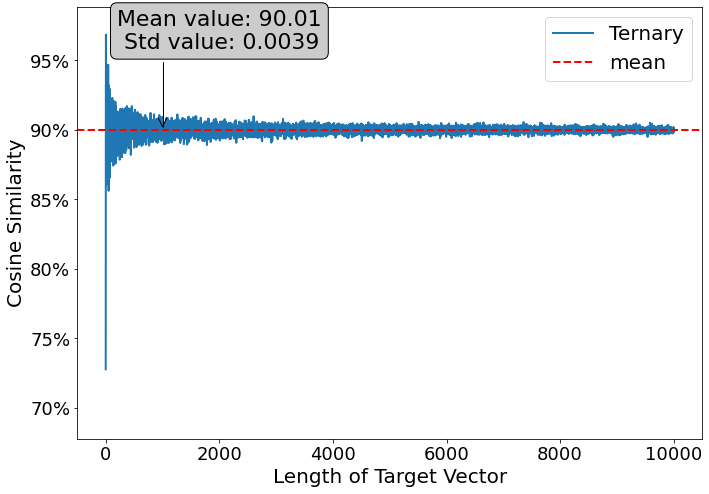

In [89]:
plot_fig1([maxresult_t], 'normal')

tensor([0.9996])


TypeError: mean() received an invalid combination of arguments - got (axis=NoneType, dtype=NoneType, out=NoneType, ), but expected one of:
 * (*, torch.dtype dtype)
 * (tuple of names dim, bool keepdim, *, torch.dtype dtype)
 * (tuple of ints dim, bool keepdim, *, torch.dtype dtype)


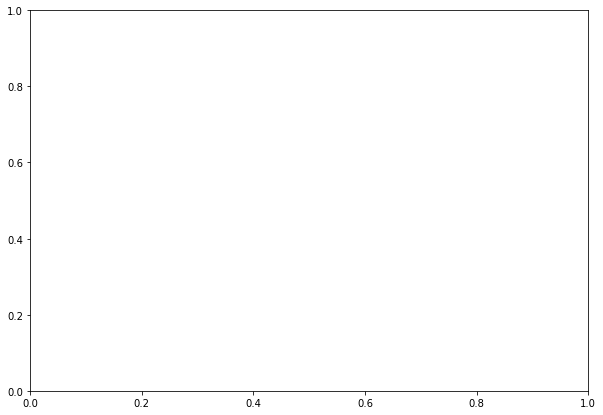

In [69]:
plot_fig1(maxresult_t, 'normal')

In [ ]:
maxresult_t = []
result_b = []
for i in range(2, 10000):
    x = torch.ra
    result = similar_cos(x)
    maxresult_t.append(result[1])
    result_b.append(result[0][-1])
plot_fig1([maxresult_t, result_b], name='uniform')

In [151]:
cost_time = []
for i in range(2, 1000):
    x = np.random.normal(0, 1, i)
    time_temp = 0
    for i in range(100):
        time1 = time.time()
        result = similar_cos(x)
        time2 = time.time()
        time_temp += (time2 - time1)
    cost_time.append((time_temp/100))

In [6]:
def plot_fig2(time_cost, name=None):
    fig1, ax1 = plt.subplots()
    x = range(0, len(time_cost))
    ax1.scatter(x, time_cost, alpha=0.5)
    ax1.set_ylim([-0.000, 0.0013])
    ax1.set_ylabel('Time Cost (Seconds)', fontsize=20)
    ax1.set_xlabel('Length of Target Vector', fontsize=20)

    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.tight_layout()

    if name == None:
        pass
    else:
        plt.savefig('{}.eps'.format(name), dpi=300)
    
    plt.show()

C:\Users\Mac\.conda\envs\tf36\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


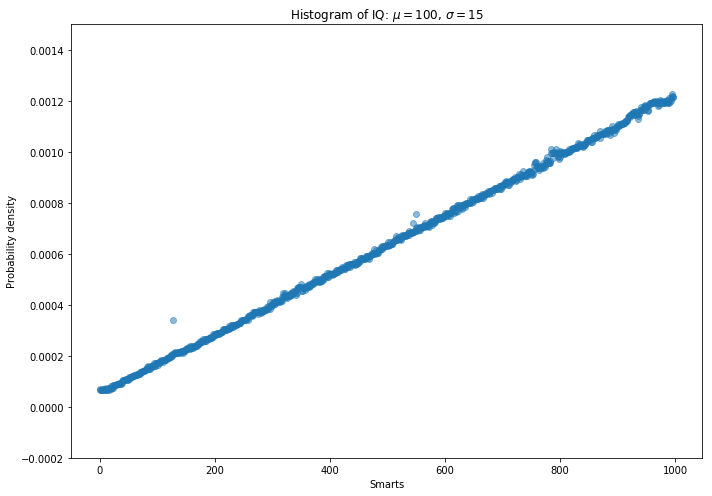

In [153]:
fig, ax = plt.subplots()
num_bins = 997
# the histogram of the data
n, bins, patches = ax.hist(cost_time, num_bins, normed=1)

# add a 'best fit' line
ax.scatter(range(len(cost_time)), cost_time, alpha=0.5)
ax.set_ylim([-0.0002, 0.0015])
# ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

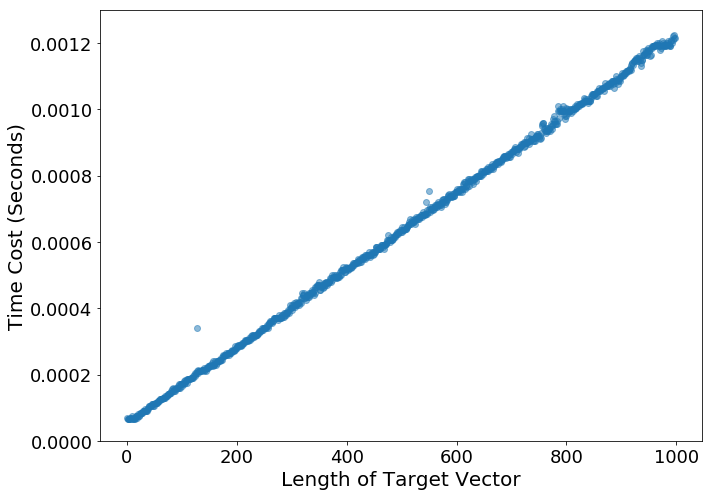

In [172]:
plot_fig2(cost_time, 'cost_time')

In [ ]:
def plot_fig3(maxValue, name=None):
    fig1, ax1 = plt.subplots()
    #minvalue = np.min(maxValue)
    #maxvalue = np.max(maxValue)
    #label_ = ['Ternary', 'Binary']
    #lebel =  ['mean', None]
    #bbox = dict(boxstyle="round", fc="0.8")
    #arrowprops = dict(arrowstyle="->",
    #                  connectionstyle="angle, angleA=0, angleB=90, rad=10")
    for counter, elem in enumerate(maxValue):
        #mean_value = np.mean(elem)
        #std_value = np.std(elem)
        x = range(0, len(elem))
        ax1.plot(x, elem, lw=2, label="{}".format(label_[counter]))
        ax1.axhline(mean_value, lw=2, label=lebel[counter], color='r', linestyle="--")
        minvalue_ = np.min(elem)
        maxvalue_ = np.max(elem)
        if counter == 0:
            plt.annotate("Mean value: {:.2f}\n Std value: {:,.2}".format(mean_value*100, std_value),
                         xy=(1000, mean_value),
                         xytext=(200, maxvalue_-0.01),
                         #arrowprops=dict(facecolor='black', shrink=0.05),
                         arrowprops=arrowprops,
                         fontsize=22,
                         bbox=bbox,
                         color='k')
        else:
             plt.annotate("Mean value: {:.2f}%\n Std value: {:,.2}".format(mean_value*100, std_value),
                         xy=(1000, mean_value),
                         xytext=(200, minvalue_+0.02),
                         arrowprops=arrowprops,
                         fontsize=22,
                         bbox=bbox,
                         color='k')

    ax1.set_ylim([minvalue - 0.05, maxvalue+0.02])
    ax1.legend(fontsize=20, loc='best')
    vals = ax1.get_yticks()
    ax1.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
    ax1.set_ylabel('Cosine Similarity', fontsize=20)
    ax1.set_xlabel('Length of Target Vector', fontsize=20)

    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.tight_layout()

    if name == None:
        pass
    else:
        plt.savefig('{}.eps'.format(name), dpi=300)
    
    plt.show()

In [4]:
precent1 = []
precent2 = []
for i in range(2, 1000):
    x1 = np.random.normal(0, 1, 1000)
    x2 = np.random.uniform(-1, 1, 1000)
    result1 = similar_cos(x1)
    result2 = similar_cos(x2)
    precent1.append(result1[0])
    precent2.append(result2[0])

ValueError: x and y must be the same size

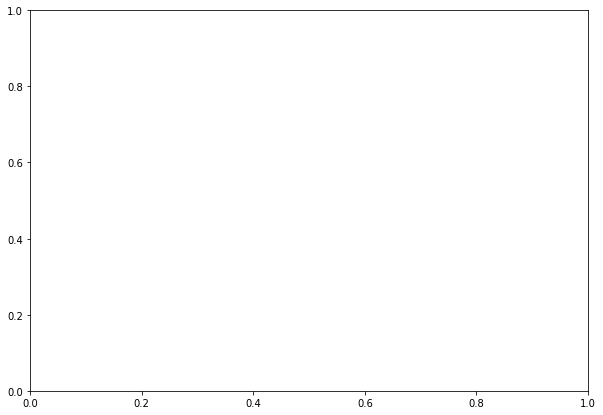

In [12]:
plot_fig2(precent1, 'test')

KeyboardInterrupt: 

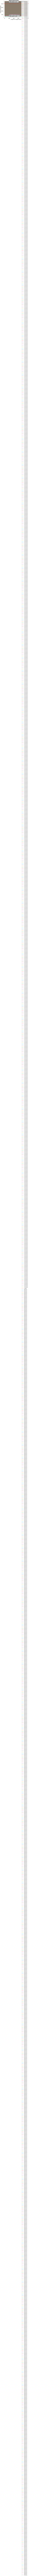

In [11]:
plot_fig1([precent1, precent2], 'test')

In [41]:
x=2
x**5

32

In [35]:
a = np.random.randint(1, 10, (3, 3, 3))

In [85]:
a1 = np.random.uniform(-1, 1, 10000)

In [86]:
a1 = normalize(a1.reshape(1, -1), axis=1).flatten()

In [87]:
a1 = sorted(np.abs(a1), reverse=True)

In [111]:
temp1 = a1[0]
temp2 = a1[0]
res1 = []
b = 0
a2 = []
for i in range(1, len(a1)):
    temp1 = temp1 + a1[i]
    a = temp1 / np.sqrt(i + 1)
    
    temp2 = 2 * temp2 + 2 * a1[i]
    b = temp2 / np.sqrt((i + 1) * 4)
    if a > b:
        res.append(a)
        b = a
    else:
        a2 = a1[:len(res)]
        break

res2 = []
b = 0
for i in range(1, len(a2)):
    
    if a > b:
        res2.append(a)
        b = a
    else:
        break

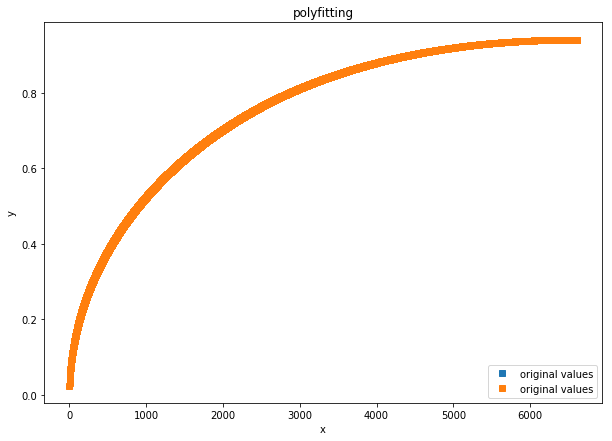

In [114]:
plot1 = plt.plot([i for i in range(len(res1))], res1, 's',label='original values')
plot1 = plt.plot([i for i in range(len(res2))], res2, 's',label='original values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=4) #指定legend的位置右下角
plt.title('polyfitting')
plt.show()